In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chunksize = 100000
chunks = []

for chunk in pd.read_csv(r"E:\Besant Tech\classes\Project\data.csv", chunksize=chunksize):
    chunks.append(chunk)

df = pd.concat(chunks, axis=0)

print(df.shape)

(100480507, 4)


In [3]:
df.head(5)

,movie_id,customer_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   movie_id     int64 
 1   customer_id  int64 
 2   rating       int64 
 3   date         object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [5]:
df['movie_id'] = df['movie_id'].astype('int32')
df['customer_id'] = df['customer_id'].astype('int32')
# df['rating'] = df['rating'].astype('int8')   # ratings are usually 1–5
df['date'] = pd.to_datetime(df['date'])      # proper datetime type
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   movie_id     int32         
 1   customer_id  int32         
 2   rating       int64         
 3   date         datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 2.2 GB
None


In [6]:
df['rating'] = df['rating'].astype('float32')   # or float64 if you prefer
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   movie_id     int32         
 1   customer_id  int32         
 2   rating       float32       
 3   date         datetime64[ns]
dtypes: datetime64[ns](1), float32(1), int32(2)
memory usage: 1.9 GB
None


In [7]:
df = df[['movie_id', 'customer_id', 'rating']]
df.head(5)

,movie_id,customer_id,rating
0,1,1488844,3.0
1,1,822109,5.0
2,1,885013,4.0
3,1,30878,4.0
4,1,823519,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   movie_id     int32  
 1   customer_id  int32  
 2   rating       float32
dtypes: float32(1), int32(2)
memory usage: 1.1 GB


In [9]:
df.tail(10)

,movie_id,customer_id,rating
100480497,17770,834323,2.0
100480498,17770,516110,5.0
100480499,17770,365996,3.0
100480500,17770,986348,4.0
100480501,17770,311124,3.0
100480502,17770,1790158,4.0
100480503,17770,1608708,3.0
100480504,17770,234275,1.0
100480505,17770,255278,4.0
100480506,17770,453585,2.0


In [10]:
#how many ppl have rated movies 1,2,3,4,5
stars = df['rating'].value_counts().sort_index()
stars

rating
1.0     4617990
2.0    10132080
3.0    28811247
4.0    33750958
5.0    23168232
Name: count, dtype: int64

In [11]:
df.isnull().sum()

movie_id       0
customer_id    0
rating         0
dtype: int64

In [12]:
#total num of customers
customer_count = df['customer_id'].nunique()
customer_count

480189

In [13]:
#total num of movies 
movie_count = df['movie_id'].nunique()
movie_count

17770

C:\Users\HP\AppData\Local\Temp\ipykernel_14532\2626307507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stars.index, y=stars.values, palette="viridis")


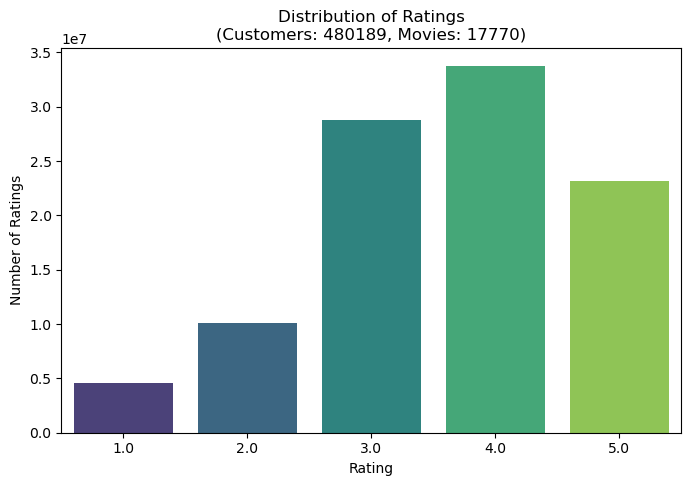

In [14]:
# Plot barplot
plt.figure(figsize=(8,5))
sns.barplot(x=stars.index, y=stars.values, palette="viridis")

plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title(f"Distribution of Ratings\n(Customers: {customer_count}, Movies: {movie_count})")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14532\689265507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movies.index, y=top_10_movies.values, palette="viridis")


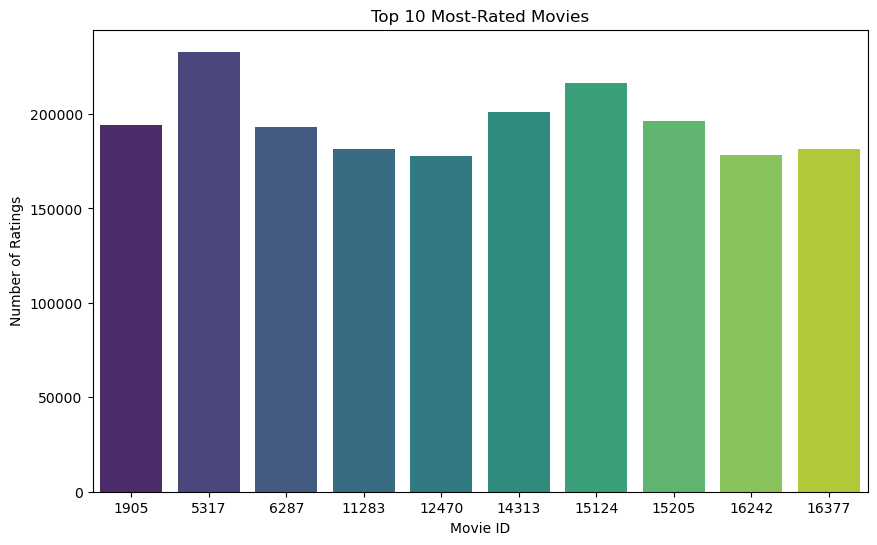

In [15]:
# Count ratings per movie_id
movie_rating_counts = df.groupby('movie_id')['rating'].count().sort_values(ascending=False)

# Select top 10
top_10_movies = movie_rating_counts.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_movies.index, y=top_10_movies.values, palette="viridis")

plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most-Rated Movies")
plt.show()

## Data cleaning
-Remove customers with very few ratings → they don’t provide enough info to build a profile.

-Remove movies with very few ratings → they’re not useful for recommendations

In [16]:
movie_summary = df.groupby('movie_id')['rating'].count()
movie_summary

movie_id
1         547
2         145
3        2012
4         142
5        1140
         ... 
17766     605
17767     204
17768    1362
17769    6749
17770     921
Name: rating, Length: 17770, dtype: int64

In [17]:
# 70th percentile (i.e., movies with ratings >= this threshold are "popular")
movie_summary.quantile(0.7)
# print(f"70th percentile threshold: {threshold}")

1948.2999999999993

In [18]:
movie_benchmark = round(movie_summary.quantile(0.7),0)
movie_benchmark

1948.0

In [19]:
# Movies with < benchmark ratings
drop_movie_list = movie_summary[movie_summary < movie_benchmark].index
drop_movie_list

Index([    1,     2,     4,     5,     6,     7,     9,    10,    11,    12,
       ...
       17754, 17755, 17757, 17759, 17760, 17765, 17766, 17767, 17768, 17770],
      dtype='int32', name='movie_id', length=12438)

In [20]:
len(drop_movie_list)

12438

In [21]:
cust_summary = df.groupby('customer_id')['rating'].agg(['count'])
cust_summary

,count
customer_id,
6,626
7,881
8,98
10,260
25,27
...,...
2649404,54
2649409,50
2649421,25


In [22]:
cust_benchmark = round(cust_summary['count'].quantile(0.5),0)
cust_benchmark

96.0

In [23]:
dropped_cust_list = cust_summary[cust_summary['count'] < cust_benchmark].index
dropped_cust_list

Index([     25,      33,      83,     126,     130,     133,     142,     149,
           158,     168,
       ...
       2649260, 2649268, 2649326, 2649337, 2649343, 2649379, 2649384, 2649404,
       2649409, 2649421],
      dtype='int32', name='customer_id', length=238914)

In [24]:
## original dataset shape is 
print("The original dataframe shape is", df.shape,"shape")

The original dataframe shape is (100480507, 3) shape


In [25]:
df['movie_id'].isin(drop_movie_list)

0            True
1            True
2            True
3            True
4            True
             ... 
100480502    True
100480503    True
100480504    True
100480505    True
100480506    True
Name: movie_id, Length: 100480507, dtype: bool

In [26]:
# df = df[~df['movie_id'].isin(drop_movie_list)] # giving memroy error , due to large size ,hence combining together
# df = df[~df['customer_id'].isin(dropped_cust_list)]

In [27]:
df = df[~df['movie_id'].isin(drop_movie_list) & ~df['customer_id'].isin(dropped_cust_list)]

In [28]:
print("After filtering:",df.shape)
print("Movies:", df['movie_id'].nunique())
print("Customers:", df['customer_id'].nunique())
print("Ratings:", len(df))

After filtering: (85149349, 3)
Movies: 5332
Customers: 241275
Ratings: 85149349


In [29]:
df.head() # since movieid-1 &2 got less rating, its filtered

,movie_id,customer_id,rating
692,3,1025579,4.0
693,3,712664,5.0
694,3,1331154,4.0
695,3,2632461,3.0
696,3,44937,5.0


In [30]:
df_title = pd.read_csv(r"E:\Besant Tech\classes\Project\title.csv")
df_title.head()

,Movie_Id,year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [31]:
df_title.shape

(17770, 3)

In [ ]:
# !pip list | grep surprise

In [32]:
!pip show scikit-surprise

In [ ]:
# !pip install scikit-surprise ==> cudnt install due to version of py , hence created sep env "surprise-env" from conda 
# intalled necessary packages, and activated kernel ,so i can switch between diff kernels now in notebook

In [33]:
import surprise
print(surprise.__version__)

1.1.4


In [34]:
##model building
import math
import seaborn as sns 
from surprise import Reader,SVD,Dataset
from surprise.model_selection import cross_validate

In [35]:
#Reader converts the dataset to the format that svd algorithm wants
reader = Reader()

In [37]:
#for quick runtime , lets take  100000 rows

data = Dataset.load_from_df(df[['movie_id', 'customer_id', 'rating']][:100000], reader)

In [38]:
data

In [39]:
model = SVD()

In [41]:
cross_validate(model,data,measures=['RMSE','MAE'],cv=4)

{'test_rmse': array([1.0145036 , 1.01559314, 1.02045112, 1.02375292]),
 'test_mae': array([0.81239129, 0.81029205, 0.81653214, 0.83067992]),
 'fit_time': (3.2941133975982666,
  2.987287998199463,
  4.013960838317871,
  4.2442238330841064),
 'test_time': (0.6426317691802979,
  0.8005428314208984,
  0.9104804992675781,
  0.8125340938568115)}

In [42]:
df.head(5)

,movie_id,customer_id,rating
692,3,1025579,4.0
693,3,712664,5.0
694,3,1331154,4.0
695,3,2632461,3.0
696,3,44937,5.0


## Now to recommend movies , How?

In [43]:
# Pick a random user who gave a 5-star rating
high_rating_user = df[df['rating'] == 5]['customer_id'].iloc[0]
print("Selected user:", high_rating_user)

Selected user: 712664


In [46]:
# take the user 712664 and try to recommend some movies based on  past data
#he has rated 5* for some num of movies
dataset_712664 = df[(df['customer_id'] == 712664) & (df['rating'] == 5.0)]
dataset_712664

,movie_id,customer_id,rating
693,3,712664,5.0
308708,79,712664,5.0
577380,175,712664,5.0
898252,199,712664,5.0
1019321,241,712664,5.0
...,...,...,...
99518212,17560,712664,5.0
99674166,17578,712664,5.0
99729212,17589,712664,5.0
99756306,17591,712664,5.0


In [47]:
df_title

,Movie_Id,year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [50]:
#building the recommendation algorithm 
user_712664 = df_title.copy()
user_712664

,Movie_Id,year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [52]:
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664   

,Movie_Id,year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17760,17761,2003.0,Levity
17761,17762,1997.0,Gattaca
17762,17763,1978.0,Interiors
17763,17764,1998.0,Shakespeare in Love


In [54]:
user_712664['Estimation Score'] = user_712664['Movie_Id'].apply(lambda x: model.predict(712664,x).est)

C:\Users\HP\AppData\Local\Temp\ipykernel_14532\2542862901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimation Score'] = user_712664['Movie_Id'].apply(lambda x: model.predict(712664,x).est)


In [55]:
user_712664

,Movie_Id,year,Name,Estimation Score
2,3,1997.0,Character,3.58636
7,8,2004.0,What the #$*! Do We Know!?,3.58636
15,16,1996.0,Screamers,3.58636
16,17,2005.0,7 Seconds,3.58636
17,18,1994.0,Immortal Beloved,3.58636
...,...,...,...,...
17760,17761,2003.0,Levity,3.58636
17761,17762,1997.0,Gattaca,3.58636
17762,17763,1978.0,Interiors,3.58636
17763,17764,1998.0,Shakespeare in Love,3.58636


In [56]:
user_712664 = user_712664.sort_values('Estimation Score',ascending=False)
print(user_712664)

       Movie_Id    year                                            Name  \
15673     15674  1999.0                                  Arlington Road   
2774       2775  2002.0                               Friday After Next   
7382       7383  2000.0                              Where the Money Is   
6314       6315  1989.0  Friday the 13th: Part 8: Jason Takes Manhattan   
11501     11502  2003.0                                   Blind Horizon   
...         ...     ...                                             ...   
16587     16588  2001.0                              Lost and Delirious   
16478     16479  1999.0                               An Affair of Love   
17320     17321  1941.0                                           Dumbo   
5518       5519  1999.0                         The West Wing: Season 1   
14388     14389  2002.0                                    The Skulls 2   

       Estimation Score  
15673          3.827679  
2774           3.795024  
7382           3.7121

## These are the top movies your model thinks user 712664 would enjoy the most.
| Movie_Id | Name                 | Estimation Score |
|----------|----------------------|------------------|
| 15674    | Arlington Road       | 3.82             |
| 2775     | Friday After Next    | 3.79             |
| 7383     | Where the Money Is   | 3.71             |


In [57]:
top_10_recommendations = user_712664.head(10)
print(top_10_recommendations)

       Movie_Id    year                                            Name  \
15673     15674  1999.0                                  Arlington Road   
2774       2775  2002.0                               Friday After Next   
7382       7383  2000.0                              Where the Money Is   
6314       6315  1989.0  Friday the 13th: Part 8: Jason Takes Manhattan   
11501     11502  2003.0                                   Blind Horizon   
13510     13511  1993.0                          Much Ado About Nothing   
3209       3210  1998.0                                      Jack Frost   
5726       5727  1984.0                            The Last Starfighter   
1663       1664  1998.0                    The King of Queens: Season 2   
1649       1650  1980.0                                    Nine to Five   

       Estimation Score  
15673          3.827679  
2774           3.795024  
7382           3.712126  
6314           3.711668  
11501          3.711415  
13510          3.7

In [65]:
def get_recommendations(user_id, model, df, df_title, top_n=10, min_ratings=50):
    """
    Generate top N movie recommendations for a given user.
    
    Parameters:
    -----------
    user_id : int
        The customer_id of the user.
    model : surprise.prediction_algorithms
        Trained recommendation model (e.g., SVD).
    df : pd.DataFrame
        Ratings dataframe with ['customer_id', 'movie_id', 'rating'].
    df_title : pd.DataFrame
        Movie metadata dataframe with ['Movie_Id', 'Name', 'year'].
    top_n : int
        Number of recommendations to return.
    min_ratings : int
        Minimum number of ratings a movie must have to be considered.
    """

    # Step 1: find movies with very few ratings (drop them)
    movie_rating_counts = df.groupby('movie_id')['rating'].count()
    drop_movie_list = movie_rating_counts[movie_rating_counts < min_ratings].index

    # Step 2: get movies this user has already rated
    seen_movies = df[df['customer_id'] == user_id]['movie_id'].tolist()

    # Step 3: filter candidate movies
    candidates = df_title.copy()
    candidates = candidates[~candidates['Movie_Id'].isin(drop_movie_list)]
    candidates = candidates[~candidates['Movie_Id'].isin(seen_movies)]

    # Step 4: predict ratings
    candidates['Estimation Score'] = candidates['Movie_Id'].apply(
        lambda x: model.predict(user_id, x).est
    )
    # loved_movies = df[(df['customer_id'] == user_id) & (df['rating'] == 5.0)]
    # loved_movies = loved_movies.merge(df_title, left_on='movie_id', right_on='Movie_Id')
    # print("Movies this user rated 5⭐:")
    # print(loved_movies[['Movie_Id', 'Name', 'year']])


    # Step 5: sort and return top N
    recommendations = candidates.sort_values('Estimation Score', ascending=False).head(top_n)
    return recommendations[['Movie_Id', 'Name', 'year', 'Estimation Score']]


In [70]:
top_10 = get_recommendations(712664, model, df, df_title, top_n=10)
print(top_10)

Movies this user rated 5⭐:
Empty DataFrame
Columns: [Movie_Id, Name, year]
Index: []
       Movie_Id                                               Name    year  \
17450     17451                                 Along for the Ride  2000.0   
14034     14035                                      Italian Movie  1993.0   
12875     12876                                                Rat  2000.0   
6070       6071                                         Fausto 5.0  2001.0   
1829       1830  Latham Entertainment Presents: An All New Come...  2003.0   
10942     10943     Ben Folds Five: Complete Sessions at West 54th  2001.0   
11042     11043                         Mary Tyler Moore: Season 1  1970.0   
17509     17510                                      Stella Street  2004.0   
12536     12537                                          Undermind  2003.0   
15217     15218  Bear in the Big Blue House: Shapes  Sounds & C...  1998.0   

       Estimation Score  
17450          3.878101  
1403